## Partie 1 : Collecte et manipulation de données via une API REST

1. Utilisation de la requête GET :

In [42]:
# Importation des bibliothèques
import requests #requests pour envoyer une requette HTTP
import csv #csv pour sauvgarder les données collectées dans un fichier CSV

In [44]:
#Étape 1: Configurer la clé API et l'URL
url = "https://jsonplaceholder.typicode.com/users" #url de l'API JSONPlaceholder
#Étape 2 : Envoyer une requête GET à l'API
response = requests.get(url)
print(response.status_code) # Afficher le status de la réponse de l'API
print(response.text) # Afficher le contenu de la réponse de l'API sous forme d'un texte brut
print("--------------------------------------------")
print(type(response)) # Afficher le type de la réponse de l'API
print(type(response.text)) # Afficher le type de contenu de la réponse de l'AP



Une erreur est survenue : HTTPConnectionPool(host='localhost', port=3000): Max retries exceeded with url: /users (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x796fa559f190>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [27]:
# Étape 3:Vérifier si la requête a réussi (status 200)
try:
    response = requests.get(url)

    if response.status_code == 200:  # Vérification de la réussite de la requête

    # Étape 4: Convertir la réponse JSON en dictionnaire Python
        data = response.json()
        import pprint  #importation du module "pretty.print"qui permet d'afficher un objet d'une manière que l'on puisse lire
        #pprint.pprint(data) #afficher la réponse JSON convertit en dictionnaire python d'une manière plus lisible
        #print("le type de la réponse JSON est:", (type(data))) #afficher le type de la réponse JSON convertit en dictionnaire python
        print("---------------------------------------------------")

        # Étape 5: Sauvegarder les données récupérées dans un fichier CSV
        with open("users.csv", mode="w", newline="") as file: # Ouvrir un fichier CSV en mode écriture
            writer = csv.writer(file) ## Créer un objet writer pour écrire dans le fichier CSV
            writer.writerow(["ID", "Name", "Email", "City"])  # Écrire l'entête du fichier CSV (colonnes)
            for user in data:
                #Écriture des données dans le fichier CSV
                writer.writerow([user["id"], user["name"], user["email"], user["address"]["city"]])

        print("Les données ont été sauvegardées dans 'users.csv'")

    else:
        print(f"Erreur lors de la récupération des données : {response.status_code}")


except Exception as e:
    print(f"Une erreur s'est produite : {e}")


---------------------------------------------------
Les données ont été sauvegardées dans 'users.csv'


In [28]:
from google.colab import files

#Étape 6: Télécharger le fichier CSV
files.download("users.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### *Résumé des étapes que j'ai réalisées*

1. **Récupération des données via une API** :
   - J'ai envoyé une requête GET à l'API `https://jsonplaceholder.typicode.com/users` pour récupérer des informations sur les utilisateurs.

2. **Vérification du succès de la requête** :
   - J'ai vérifié si la requête a réussi (statut 200). Si oui, j'ai converti les données JSON reçues en une liste Python. Sinon, j'ai affiché un message d'erreur.

3. **Création et écriture dans un fichier CSV** :
   - J'ai créé un fichier appelé `users.csv`.
   - J'y ai ajouté les colonnes (`ID`, `Name`, `Email`, `City`) comme entête.
   - J'ai écrit les données des utilisateurs ligne par ligne dans le fichier CSV.

4. **Confirmation de la sauvegarde** :
   - Une fois toutes les données enregistrées, j'ai affiché un message pour confirmer que l'opération était un succès.

5. **Gestion des erreurs** :
   - En cas de problème (connexion ou traitement), j'ai capturé l'exception et affiché un message d'erreur pour expliquer la situation.

6. **Téléchargement du fichier CSV** :

  - J'ai utilisé le module google.colab pour télécharger le fichier CSV créé

2. Envoyer une requête POST

In [34]:
#Étape 1: Créer un nouvel utilisateur
new_user = {
    "name": "Jane Doe",
    "email": "janedoe@example.com",
    "address": {"city": "Paris"}
}


In [35]:
#Étape 2: Envoyer une requête POST à l'API pour ajouter le nouvel utilisateur
response = requests.post("https://jsonplaceholder.typicode.com/users", json=new_user)

#Étape 3: Vérifier si l'utilisateur a été ajouté avec succès
if response.status_code == 201:
    print("Nouvel utilisateur ajouté avec succès!") #afficher un msg de confirmation si l'utilisateur a été bien ajouté
    print(response.json())  # Afficher les données de l'utilisateur ajouté
else:
    print("Erreur lors de l'ajout de l'utilisateur") #Afficher un message d'erreur si la requête a été échouée


Nouvel utilisateur ajouté avec succès!
{'name': 'Jane Doe', 'email': 'janedoe@example.com', 'address': {'city': 'Paris'}, 'id': 11}


### *Résumé des étapes réalisées pour la requête POST*

1. **Étape 1 - Création des données du nouvel utilisateur** :
   - J'ai créé un dictionnaire contenant les informations du nouvel utilisateur, incluant son nom, son email, et son adresse avec la ville de Paris.

2. **Étape 2 - Envoi de la requête POST** :
   - J'ai envoyé une requête **POST** à l'API **JSONPlaceholder** pour ajouter le nouvel utilisateur.

3. **Étape 3 - Vérification de la réussite de l'ajout** :
   - Le code vérifie si la requête a été traitée avec succès (status code **201**). Si oui, un message de confirmation est affiché avec les données de l'utilisateur ajouté. Si la requête échoue, un message d'erreur est affiché.




3. Utilisation de la requête PUT

In [32]:
#Étape 1: Définir les données mises à jour pour l'utilisateur
updated_user = {
    "name": "John Updated",
    "email": "johnupdated@example.com"
}

#Étape 2: Envoyer une requête PUT à l'API pour mettre à jour les informations de l'utilisateur avec ID 1
response = requests.put("https://jsonplaceholder.typicode.com/users/1", json=updated_user)

#Étape 3: Vérifier si la mise à jour a réussi
if response.status_code == 200:
    print("Utilisateur mis à jour avec succès!")
    print(response.json())  # Afficher les données mises à jour
else:
    print("Erreur lors de la mise à jour de l'utilisateur") # Si la requête échoue, afficher un message d'erreur


Utilisateur mis à jour avec succès!
{'name': 'John Updated', 'email': 'johnupdated@example.com', 'id': 1}


### *Résumé des étapes réalisées pour mettre à jour un utilisateur*

1. **Étape 1 - Définir les données mises à jour pour l'utilisateur** :
   - J'ai créé un dictionnaire contenant les nouvelles informations de l'utilisateur à mettre à jour, avec un nouveau nom et un nouvel email.

2. **Étape 2 - Envoi de la requête PUT** :
   - J'ai envoyé une requête **PUT** à l'API **JSONPlaceholder** pour mettre à jour les informations de l'utilisateur avec l'ID `1`.

3. **Étape 3 - Vérification de la réussite de la mise à jour** :
   - J'ai vérifié si la mise à jour a réussi en contrôlant le **code de statut HTTP** (200 pour succès). Si la requête a réussi, le programme affiche un message de confirmation avec les nouvelles données de l'utilisateur. Si la requête échoue, il affiche un message d'erreur.



4. Utilisation de la requête DELETE

In [45]:
#Étape 1: Envoyer une requête DELETE pour supprimer un utilisateur avec l'ID 2
response = requests.delete("https://jsonplaceholder.typicode.com/users/2")

# Vérifier si la suppression de l'utilisateur a réussi
if response.status_code == 200:
    print("Utilisateur supprimé avec succès!")
else:
    print("Erreur lors de la suppression de l'utilisateur")


# Étape 2: Vérifier si l'utilisateur a bien été supprimé
# Envoyer une requête GET pour récupérer l'utilisateur avec l'ID 2
response = requests.get("https://jsonplaceholder.typicode.com/users/2")
print(response.status_code)
# Vérifier si l'utilisateur existe toujours
if response.status_code == 404:
    print("L'utilisateur n'existe plus")
else:
    print("L'utilisateur existe toujours")


Utilisateur supprimé avec succès!
200
L'utilisateur existe toujours


### *Résumé des étapes réalisées pour supprimer un utilisateur avec la requête DELETE*

1. **Étape 1 - Suppression de l'utilisateur**  :
   - J'ai envoyé une requête **DELETE** à l'API **JSONPlaceholder** pour supprimer un utilisateur avec l'ID `2`.
   - Après l'envoi de la requête, j'ai vérifié si la suppression a été réussie en vérifiant le code de statut de la réponse.
   - Si le code est **200**, cela signifie que la suppression a été effectuée avec succès, et un message de confirmation a été affiché. Si la requête échoue, un message d'erreur est affiché.

2. **Étape 2 - Vérification de la suppression de l'utilisateur (requête GET)** :
   - Ensuite, j'ai envoyé une requête **GET** à l'API pour tenter de récupérer l'utilisateur avec l'ID `2`.
   - Si la réponse renvoie un code de statut **404**, cela signifie que l'utilisateur n'a pas été trouvé, ce qui confirme qu'il a été supprimé. Si la réponse renvoie un autre code, cela signifie que l'utilisateur existe encore.

   La sortie du code indique que la requête a été envoyée correctement et que l'utilisateur a été supprimé avec succès. Cependant, à la vérification de la suppression, le code montre que l'utilisateur existe toujours. Cela signifie que **JSONPlaceholder** simule la suppression, mais ne modifie pas réellement sa base de données.




# Partie 2 : Collecte et analyse descriptive de données via une API REST


1. Collecte de données via une API REST :


In [48]:
#Importation de bibliothèques
import requests
import pandas as pd

# URL de l'API pour récupérer les données COVID-19 en France
url = "https://api.covidtracking.com/v1/us/daily.json"


In [49]:
# Étape 1 : Envoyer une requête GET à l'API pour récupérer les données
response = requests.get(url)

# Étape 2: Vérifier si la requête a réussi
if response.status_code == 200:

    # Étape 3: Convertir la réponse JSON en un DataFrame pandas
    data = response.json()
    df = pd.DataFrame(data)

    # Étape 4: Sauvegarder les données dans un fichier CSV
    df.to_csv("covid_france_data.csv", index=False)
    print("Données récupérées et sauvegardées dans 'covid_france_data.csv'")
else:
    print("Erreur lors de la récupération des données")


Données récupérées et sauvegardées dans 'covid_france_data.csv'


In [13]:
# Étape 5: Télécharger le fichier CSV
from google.colab import files
files.download("covid_france_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### *Résumé du Collecte de données via une API REST*

1. **Étape 1 - Envoi de la requête GET** :  
   J'ai envoyé une requête **GET** à l'API pour récupérer les données COVID-19 en France.

2. **Étape 2 - Vérification de la réussite de la requête** :  
   J'ai vérifié si la requête a réussi en contrôlant le *code de statut HTTP*.

3. **Étape 3 - Conversion des données JSON en DataFrame pandas** :  
   J'ai converti la réponse JSON obtenue en un *DataFrame pandas*, ce qui m'a permis de manipuler facilement les données.

4. **Étape 4 - Sauvegarde des données dans un fichier CSV** :  
   J'ai sauvegardé les données traitées dans un fichier *CSV* nommé `covid_france_data.csv` pour les conserver.

5. **Étape 5 - Téléchargement du fichier CSV** :  
   J'ai téléchargé le fichier *CSV* sur mon ordinateur localement.




### 2. Préparation des données :

2.1 Charger et nettoyer les données :

In [51]:
# Étape  1:Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv("/content/covid_france_data (1).csv")

# Un apercu global sur les données
# Afficher les 5 premières lignes
print(df.head())
print("----------------------------------------------")

# Afficher les colonnes disponibles dans le jeu de données
print(df.columns)
print("----------------------------------------------")

# Vérifier les types de données des colonnes
print(df.dtypes)
print("----------------------------------------------")


       date  states    positive    negative  pending  hospitalizedCurrently  \
0  20210307      56  28756489.0  74582825.0  11808.0                40199.0   
1  20210306      56  28714654.0  74450990.0  11783.0                41401.0   
2  20210305      56  28654639.0  74307155.0  12213.0                42541.0   
3  20210304      56  28585852.0  74035238.0  12405.0                44172.0   
4  20210303      56  28520365.0  73857281.0  11778.0                45462.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                776361.0          8134.0          45475.0   
1                775635.0          8409.0          45453.0   
2                775132.0          8634.0          45373.0   
3                772351.0          8970.0          45293.0   
4                770821.0          9359.0          45214.0   

   onVentilatorCurrently  ...          lastModified recovered  total  posNeg  \
0                 2802.0  ...  2021-03-07T24:00:00Z       NaN      0    

In [50]:
# Étape 2: Identifier les valeurs manquantes

print(df.isnull().sum())  # Nombre de valeurs manquantes par colonne
print("-------------------------------------------------")
print(df.isnull().mean() * 100)  # Pourcentage de valeurs manquantes


date                          0
states                        0
positive                      1
negative                     48
pending                      51
hospitalizedCurrently        64
hospitalizedCumulative       51
inIcuCurrently               73
inIcuCumulative              72
onVentilatorCurrently        72
onVentilatorCumulative       79
dateChecked                   0
death                        28
hospitalized                 51
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64
-------------------------------------------------
date                          0.000000
states                        0.000000
positive                      0.238095
negative            

2.2 Nettoyage des données :

In [52]:
# Étape 3: gestion des valeurs manquantes

#Imputation des valeurs manquantes par la moyenne
colonnes_a_conserver = df.columns[df.isnull().mean() < 0.9] #les colonnes avec moins de 90 % de valeurs manquantes

for colonne in colonnes_a_conserver:
    if df[colonne].dtype in ['float64', 'int64']:  # Colonnes numériques uniquement
        df[colonne].fillna(df[colonne].mean(), inplace=True)

# Afficher les données après imputation des valeurs manquantes
print("\nDonnées après imputation :")

# Vérifier les valeurs manquantes après l'imputation
print(df.isnull().sum())




Données après imputation :
date                          0
states                        0
positive                      0
negative                      0
pending                       0
hospitalizedCurrently         0
hospitalizedCumulative        0
inIcuCurrently                0
inIcuCumulative               0
onVentilatorCurrently         0
onVentilatorCumulative        0
dateChecked                   0
death                         0
hospitalized                  0
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64


<ipython-input-52-a7f2eff21427>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colonne].fillna(df[colonne].mean(), inplace=True)


In [47]:
# Supprimer les colonnes contenant plus de 90% de valeurs manquantes
df_cleaned = df.dropna(axis=1, thresh=len(df) * 9.0 / 10.0)

# Afficher les données après suppression des colonnes
print("\nDonnées après suppression des colonnes :")
#vérifier la suppression des valeurs manquantes
print(df_cleaned.isnull().sum())




Données après suppression des colonnes :
date                        0
states                      0
positive                    0
negative                    0
pending                     0
hospitalizedCurrently       0
hospitalizedCumulative      0
inIcuCurrently              0
inIcuCumulative             0
onVentilatorCurrently       0
onVentilatorCumulative      0
dateChecked                 0
death                       0
hospitalized                0
totalTestResults            0
lastModified                0
total                       0
posNeg                      0
deathIncrease               0
hospitalizedIncrease        0
negativeIncrease            0
positiveIncrease            0
totalTestResultsIncrease    0
hash                        0
dtype: int64


In [53]:
# Étape 4: idenfifier les doublons
# Afficher les doublons de toutes les colonnes
duplicates = df[df.duplicated()]

# Afficher les doublons
print("Les doublons dans le fichier CSV :")
print(duplicates)

Les doublons dans le fichier CSV :
Empty DataFrame
Columns: [date, states, positive, negative, pending, hospitalizedCurrently, hospitalizedCumulative, inIcuCurrently, inIcuCumulative, onVentilatorCurrently, onVentilatorCumulative, dateChecked, death, hospitalized, totalTestResults, lastModified, recovered, total, posNeg, deathIncrease, hospitalizedIncrease, negativeIncrease, positiveIncrease, totalTestResultsIncrease, hash]
Index: []

[0 rows x 25 columns]


In [54]:
# Afficher les doublons en fonction des colonnes('date', 'states', 'positive')
duplicates = df[df.duplicated(subset=['date', 'states', 'positive'])]

# Afficher les doublons trouvés
print(duplicates)


Empty DataFrame
Columns: [date, states, positive, negative, pending, hospitalizedCurrently, hospitalizedCumulative, inIcuCurrently, inIcuCumulative, onVentilatorCurrently, onVentilatorCumulative, dateChecked, death, hospitalized, totalTestResults, lastModified, recovered, total, posNeg, deathIncrease, hospitalizedIncrease, negativeIncrease, positiveIncrease, totalTestResultsIncrease, hash]
Index: []

[0 rows x 25 columns]


### **Explication du processus de préparation des données**

1. **Charger et inspecter les données :**
   - J'ai utilisé **`pd.read_csv()`** pour charger le fichier CSV dans un DataFrame pandas.
   - Ensuite, j'ai affiché les 5 premières lignes du DataFrame pour avoir un aperçu rapide des données et vérifier leur format.
   - J'ai également vérifié les noms des colonnes et les types de données afin de mieux comprendre les informations contenues dans le jeu de données.

2. **Identifier les valeurs manquantes :**
   - J'ai utilisé **`df.isnull().sum()`** pour obtenir le nombre de valeurs manquantes dans chaque colonne.
   - Ensuite, j'ai calculé le pourcentage de valeurs manquantes par colonne afin d'identifier les colonnes avec un grand nombre de valeurs manquantes. Cela m'a aidé à décider quelles colonnes traiter et quelles colonnes pourraient être supprimées.

3. **Imputation des valeurs manquantes :**
   - J'ai sélectionné les colonnes avec moins de 90 % de valeurs manquantes. Cela m'a permis de ne traiter que les colonnes qui contiennent une quantité raisonnable de données.
   - Pour ces colonnes numériques, j'ai imputé les valeurs manquantes par la moyenne de chaque colonne. Cela garantit que les colonnes numériques ne perdent pas d'informations importantes à cause des valeurs manquantes.

4. **Suppression des colonnes avec trop de valeurs manquantes :**
   - J'ai supprimé les colonnes contenant plus de 90 % de valeurs manquantes. Cela permet de nettoyer les colonnes qui ne fournissent pas suffisamment d'informations et de garder uniquement les colonnes pertinentes.

5. **Vérification des modifications :**
   - Après avoir imputé les valeurs manquantes et supprimé certaines colonnes, j'ai vérifié que les données étaient correctement nettoyées en affichant à nouveau le nombre de valeurs manquantes restantes.
   

6. **Identification des doublons :**
   - J'ai utilisé **`df.duplicated()`** pour identifier les doublons dans toutes les colonnes. Après que le code m'a affiché qu'il n'y avait pas de doublons dans l'ensemble complet des colonnes, j'ai décidé d'identifier les doublons spécifiquement en fonction des colonnes **`'date'`, `'states'`**, et **`'positive'`**. Cela m'a permis de vérifier si des enregistrements en double existaient pour ces critères particuliers.





### 3. Analyse descriptive :

3.1 Calcul des statistiques de base :

In [23]:
# Calculer la moyenne, médiane, minimum, maximum, écart-type
mean_cases = df["positive"].mean()
median_cases = df["positive"].median()
min_cases = df["positive"].min()
max_cases = df["positive"].max()
std_dev_cases = df["positive"].std()

print(f"Moyenne des cas : {mean_cases}")
print(f"Médiane des cas : {median_cases}")
print(f"Cas minimum : {min_cases}")
print(f"Cas maximum : {max_cases}")
print(f"Écart-type des cas : {std_dev_cases}")

# Calculer le nombre total de décès
total_deaths = df["death"].sum()
print(f"Nombre total de décès : {total_deaths}")


Moyenne des cas : 8116686.680190931
Médiane des cas : 5044337.0
Cas minimum : 0.0
Cas maximum : 28756489.0
Écart-type des cas : 8967431.63277846
Nombre total de décès : 73386582.0


In [24]:
df.describe()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,totalTestResults,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.200000e+02,420.000000,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,...,369.000000,4.200000e+02,0.0,420.0,420.0,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,2.020218e+07,49.476190,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,...,310817.140921,1.073369e+08,NaN,0.0,0.0,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,3.472227e+03,16.896764,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,...,235557.870159,1.129172e+08,NaN,0.0,0.0,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,4.000000,0.000000e+00,NaN,0.0,0.0,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,...,123250.000000,5.888598e+06,NaN,0.0,0.0,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,2.020081e+07,56.000000,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,...,280138.000000,6.839699e+07,NaN,0.0,0.0,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,2.020112e+07,56.000000,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,...,481309.000000,1.854937e+08,NaN,0.0,0.0,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.021031e+07,56.000000,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,...,776361.000000,3.638251e+08,NaN,0.0,0.0,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


3.2 Visualisation des données :

a. Histogramme (pour la distribution des données)

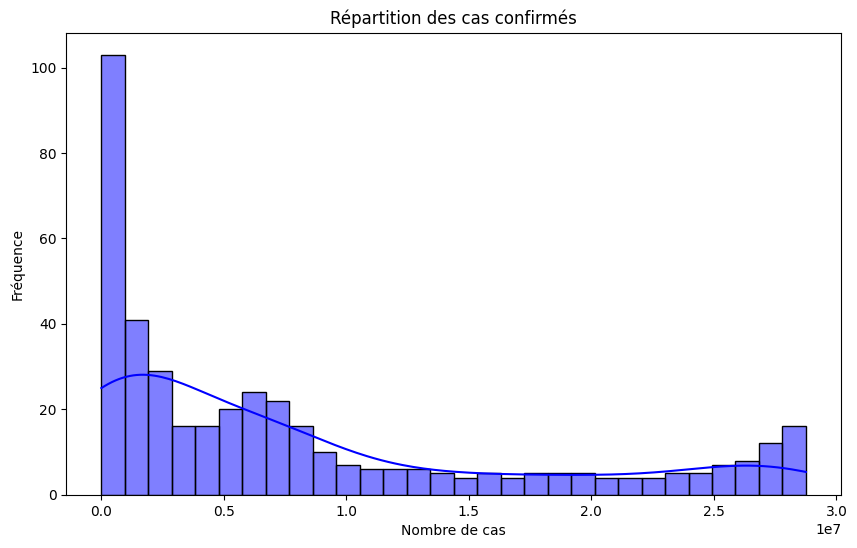

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un histogramme pour une colonne spécifique (par exemple, 'positive' pour les cas confirmés)
plt.figure(figsize=(10, 6))
sns.histplot(df['positive'], bins=30, kde=True, color='blue')
plt.title('Répartition des cas confirmés')
plt.xlabel('Nombre de cas')
plt.ylabel('Fréquence')
plt.show()


b. Boxplot (pour identifier les anomalies)

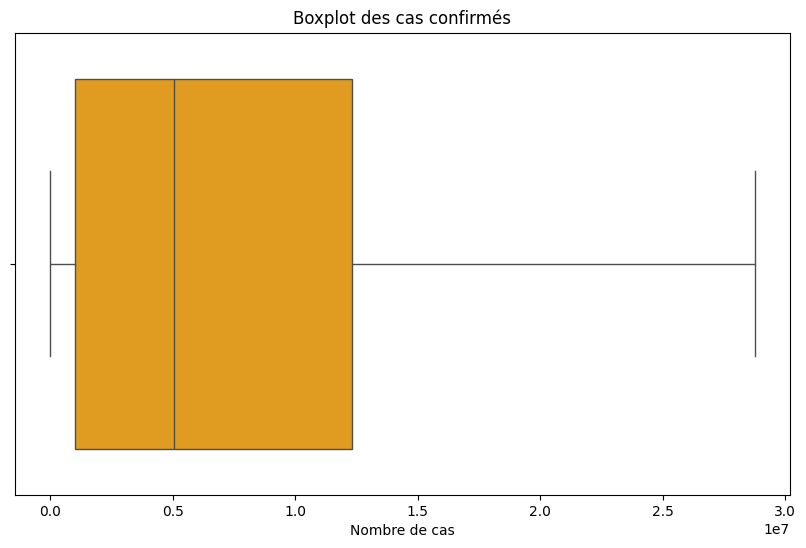

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['positive'], color='orange')
plt.title('Boxplot des cas confirmés')
plt.xlabel('Nombre de cas')
plt.show()


c. Visualisation des relations entre les variables

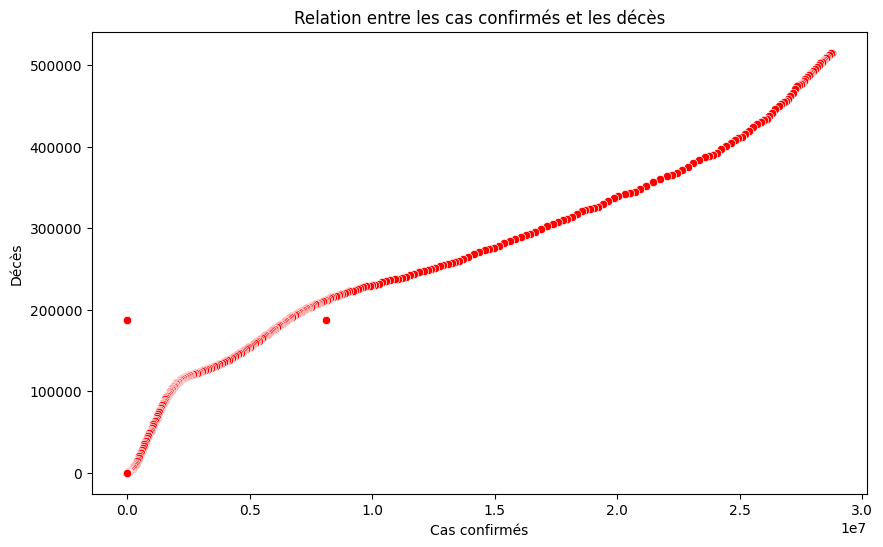

In [57]:
# Diagramme de dispersion pour analyser la relation entre les cas confirmés et les décès
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['positive'], y=df['death'], color='red')
plt.title('Relation entre les cas confirmés et les décès')
plt.xlabel('Cas confirmés')
plt.ylabel('Décès')
plt.show()


d. Identification des anomalies potentielles

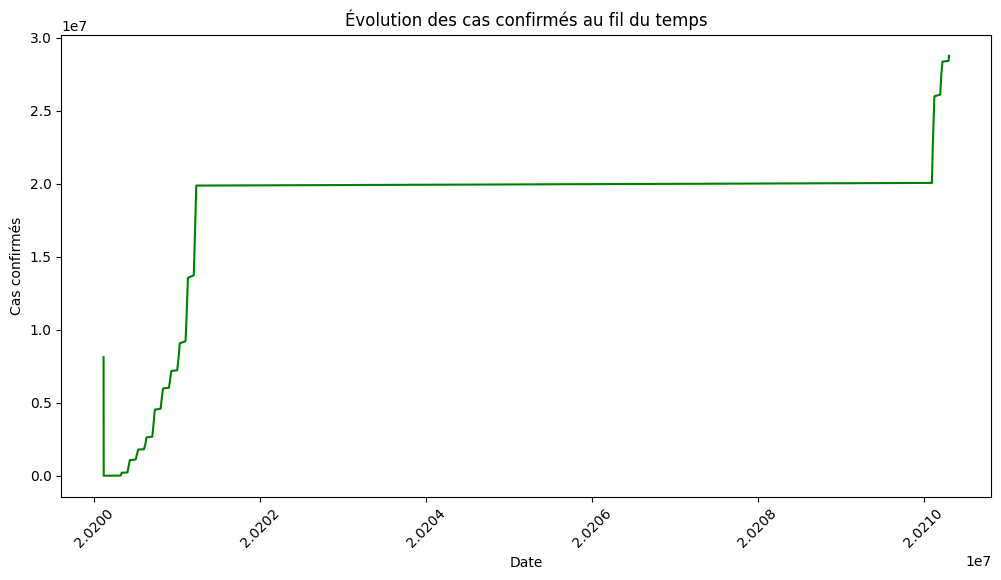

In [58]:
# Tracer l'évolution des cas confirmés au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['positive'], color='green')
plt.title('Évolution des cas confirmés au fil du temps')
plt.xlabel('Date')
plt.ylabel('Cas confirmés')
plt.xticks(rotation=45)
plt.show()


### **Résumé de l'analyse descriptive des données**

1. **Calcul des statistiques de base** :
   - J'ai calculé **Statistiques de base** : Moyenne, médiane, minimum, maximum, écart-type, et somme pour obtenir un aperçu global des données.

2. **Visualisation des données** :

   a. *Histogramme* :  
      J'ai créé un *histogramme* pour observer la répartition des cas confirmés de COVID-19.

   b. *Boxplot* :  
      J'ai utilisé un *boxplot* pour identifier les *valeurs aberrantes* ou anomalies dans les cas confirmés. Le boxplot permet de visualiser les **outliers** et d'analyser la dispersion des données.

   c. *Diagramme de dispersion* :  
      J'ai créé un *diagramme de dispersion* pour examiner la relation entre le nombre de **cas confirmés** et le **nombre de décès**. Cela m'a permis d'observer s'il y a une corrélation visible entre ces deux variables.

   d. *Évolution au fil du temps* :  
      J'ai tracé l'évolution des cas confirmés au fil du temps avec un *graphique linéaire*. Cela permet d'observer la tendance des cas au fil des jours et de détecter des changements dans la dynamique de la pandémie.


